In [1]:
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

In [2]:
!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

--2024-03-11 15:38:51--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>] 100.13M   191MB/s    in 0.5s    

2024-03-11 15:38:52 (191 MB/s) - ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’ saved [104996770/104996770]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py37h06a4308_2
    - cffi==1.15.0=py37hd667e15_1
    

In [3]:
!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
!python -m pip install pandas
!rm $MINICONDA_INSTALLER_SCRIPT
import sys

  Cloning https://github.com/ersilia-os/ersilia.git to /tmp/pip-req-build-jkmc5ksh
  Running command git clone -q https://github.com/ersilia-os/ersilia.git /tmp/pip-req-build-jkmc5ksh
  Resolved https://github.com/ersilia-os/ersilia.git to commit ab5dd7e662c75337a853acf3157487b7075d0f29
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 670 kB 8.3 MB/s 
     |████████████████████████████████| 4.3 MB 47.6 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 97 kB 7.5 MB/s 
     |████████████████████████████████| 78 kB 6.8 MB/s 
     |████████████████████████████████| 58 kB 6.0 MB/s 
     |████████████████████████████████| 421 kB 67.5 MB/s 
     |████████████████████████████████| 139 kB 71.0 MB/s 
     |████████████████████████████████| 9.9 MB 72.4 MB/s 
     |████████████████████████████████| 148 kB 68.8 MB/s 
     |█████████

In [4]:
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [5]:
import sys

In [6]:
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [7]:
## Mount google drive
from google.colab import drive

In [8]:
drive.mount("/content/drive")

Mounted at /content/drive


In [9]:
# specifying my input folder

input_folder = "/content/drive/MyDrive/Ersilia"

In [10]:
#downloading a sample dataset
!wget "https://raw.githubusercontent.com/ersilia-os/ersilia/master/notebooks/eml_canonical.csv"

In [11]:
# specifying my output folder

output_folder = "/content/drive/MyDrive/Ersilia"

Download and run the selected model from Ersilia and make sure it works

In [12]:
model_name = "eos6oli"

Fetching the model

In [13]:
# Fetching the model
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
  Running command git clone -q https://github.com/ersilia-os/bentoml-ersilia.git /tmp/pip-req-build-m6pdhhqj
Solving environment: / failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/eosbase-bentoml-0.11.0-py37

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2023.12.12 |       h06a4308_0 

Serving the model

In [47]:
# Serving the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:52651
   PID: 5713
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


Running Predictions for a sample dataset

In [14]:
# specifying the name of my input csv file

input_filename = "eml_canonical"

In [15]:
# specifying the SMILES column name
smiles_column = "can_smiles"

In [17]:
# Extracting SMILES to a list
import pandas as pd

In [18]:
path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")

My dataset contains 442 SMILES


In [19]:
 #Running predictions
api = "calculate"

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()

Successful 👍! Time taken: 59.2 seconds


In [22]:
# Checking the results

print(output.head())

                           key  \
0  MCGSCOLBFJQGHM-SCZZXKLOSA-N   
1  GZOSMCIZMLWJML-VJLLXTKPSA-N   
2  BZKPWHYZMXOIDC-UHFFFAOYSA-N   
3  QTBSBXVTEAMEQO-UHFFFAOYSA-N   
4  PWKSKIMOESPYIA-BYPYZUCNSA-N   

                                               input  solubility  
0      Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1      -2.332  
1  C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...      -5.090  
2                         CC(=O)Nc1nnc(S(N)(=O)=O)s1      -1.242  
3                                            CC(=O)O       1.229  
4                            CC(=O)N[C@@H](CS)C(=O)O      -0.308  


In [23]:
#Saving the results in Google Drive

output_path = "%s/%s_output.csv" % (output_folder, model_name)
output.to_csv(output_path, index=False)

In [24]:
#reading the result in
eos6oli=pd.read_csv("/content/drive/MyDrive/Ersilia/eos6oli_output.csv")
eos6oli.head()

,key,input,solubility
0,MCGSCOLBFJQGHM-SCZZXKLOSA-N,Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1,-2.332
1,GZOSMCIZMLWJML-VJLLXTKPSA-N,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,-5.090
2,BZKPWHYZMXOIDC-UHFFFAOYSA-N,CC(=O)Nc1nnc(S(N)(=O)=O)s1,-1.242
3,QTBSBXVTEAMEQO-UHFFFAOYSA-N,CC(=O)O,1.229
4,PWKSKIMOESPYIA-BYPYZUCNSA-N,CC(=O)N[C@@H](CS)C(=O)O,-0.308


In [26]:
#matching the smiles with the drug names

import pandas as pd
# Merge dataframes on the common column "can_smiles"
merged_df = pd.merge(eos6oli, df[['can_smiles', 'drugs']], how='left', left_on='input', right_on='can_smiles')

# Drop the redundant "can_smiles" column
merged_df.drop('can_smiles', axis=1, inplace=True)

print(merged_df)


                             key  \
0    MCGSCOLBFJQGHM-SCZZXKLOSA-N   
1    GZOSMCIZMLWJML-VJLLXTKPSA-N   
2    BZKPWHYZMXOIDC-UHFFFAOYSA-N   
3    QTBSBXVTEAMEQO-UHFFFAOYSA-N   
4    PWKSKIMOESPYIA-BYPYZUCNSA-N   
..                           ...   
453  QTXVAVXCBMYBJW-UHFFFAOYSA-N   
454  HUCJFAOMUPXHDK-UHFFFAOYSA-N   
455  HBOMLICNUCNMMY-XLPZGREQSA-N   
456  NWONKYPBYAMBJT-UHFFFAOYSA-L   
457  FUXFIVRTGHOMSO-UHFFFAOYSA-N   

                                                 input  solubility  \
0        Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1      -2.332   
1    C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...      -5.090   
2                           CC(=O)Nc1nnc(S(N)(=O)=O)s1      -1.242   
3                                              CC(=O)O       1.229   
4                              CC(=O)N[C@@H](CS)C(=O)O      -0.308   
..                                                 ...         ...   
453              CC(=O)CC(c1ccccc1)c1c(O)oc2ccccc2c1=O      -4.905   
454    

In [27]:
#saving the output
merged_df.to_csv("/content/drive/MyDrive/Ersilia/merged_data.csv", index=False)

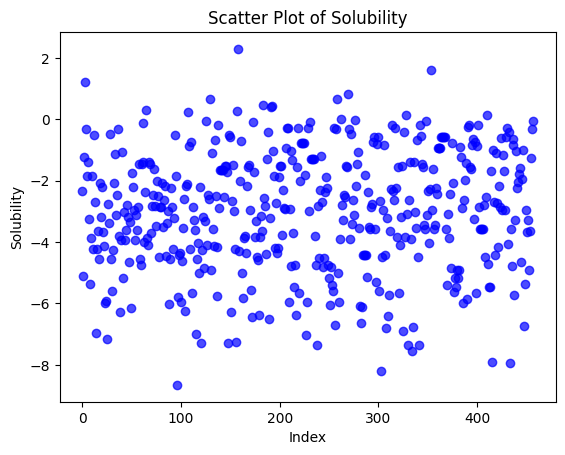

In [28]:
#plotting a scatter plot of the result

import matplotlib.pyplot as plt


solubility_values = merged_df['solubility']

# Create a scatter plot
plt.scatter(range(len(solubility_values)), solubility_values, marker='o', color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Solubility')
plt.title('Scatter Plot of Solubility')

# Show the plot
plt.show()


Making Predictions with 1000 molecules downloaded from chembl

Exploratory Data Analysis

In [30]:
import pandas as pd
chembl=pd.read_csv("/content/drive/MyDrive/Ersilia/Chembl.tsv",sep='\t')
chembl.head()

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key
0,CHEMBL1868702,GESTRINONE,A 46 745|A-46-745|A-46745|DIMETRIOSE|GESTRINON...,Small molecule,4.0,308.42,19.0,61.0,3.72,37.30,...,23,2,1,0,308.1776,1.86,NEUTRAL,C21H24O2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3C=...,BJJXHLWLUDYTGC-ANULTFPQSA-N
1,CHEMBL2106076,CEFPIROME SULFATE,CEFPIROME SULFATE|CEFPIROME SULFATE (1:1)|CEFP...,Small molecule,4.0,612.67,1.0,1.0,-1.04,153.92,...,35,11,3,2,514.1093,-0.19,ACID,C22H24N6O9S3,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(C[n...,RKTNPKZEPLCLSF-QHBKFCFHSA-N
2,CHEMBL1446650,MEBEVERINE HYDROCHLORIDE,COLOFAC|COLOFAC 100|COLOFAC IBS|COLOFAC MR|CSA...,Small molecule,4.0,466.02,15.0,44.0,4.60,57.23,...,31,6,0,0,429.2515,-0.60,BASE,C25H36ClNO5,CCN(CCCCOC(=O)c1ccc(OC)c(OC)c1)C(C)Cc1ccc(OC)c...,PLGQWYOULXPJRE-UHFFFAOYSA-N
3,CHEMBL3707281,MAGNESIUM LACTATE,"ANHYDROUS MAGNESIUM LACTATE, DL-|DL-LACTIC ACI...",Small molecule,4.0,202.44,NaN,NaN,None,None,...,None,None,None,None,202.0328,None,None,C6H10MgO6,CC(O)C(=O)[O-].CC(O)C(=O)[O-].[Mg+2],OVGXLJDWSLQDRT-UHFFFAOYSA-L
4,CHEMBL3833409,HYDROTALCITE,HYDROTALCITE,Small molecule,4.0,531.91,NaN,NaN,None,None,...,None,None,None,None,529.9019,None,None,CH16Al2Mg6O19,O=C([O-])[O-].[Al+3].[Al+3].[Mg+2].[Mg+2].[Mg+...,GDVKFRBCXAPAQJ-UHFFFAOYSA-A


In [31]:
chembl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ChEMBL ID                        3592 non-null   object 
 1   Name                             3592 non-null   object 
 2   Synonyms                         3538 non-null   object 
 3   Type                             3592 non-null   object 
 4   Max Phase                        3592 non-null   float64
 5   Molecular Weight                 3522 non-null   float64
 6   Targets                          2954 non-null   float64
 7   Bioactivities                    2954 non-null   float64
 8   AlogP                            3522 non-null   object 
 9   Polar Surface Area               3522 non-null   object 
 10  HBA                              3522 non-null   object 
 11  HBD                              3522 non-null   object 
 12  #RO5 Violations     

In [32]:
#checking for missing values
chembl.isnull().sum()

ChEMBL ID                            0
Name                                 0
Synonyms                            54
Type                                 0
Max Phase                            0
Molecular Weight                    70
Targets                            638
Bioactivities                      638
AlogP                               70
Polar Surface Area                  70
HBA                                 70
HBD                                 70
#RO5 Violations                     70
#Rotatable Bonds                    70
Passes Ro3                          70
QED Weighted                        70
CX Acidic pKa                       70
CX Basic pKa                        70
CX LogP                             70
CX LogD                             70
Aromatic Rings                      70
Structure Type                       0
Inorganic Flag                       0
Heavy Atoms                         70
HBA (Lipinski)                      70
HBD (Lipinski)           

In [36]:
#removing missing values
chembl=chembl.dropna()


In [37]:
chembl.isnull().sum()

ChEMBL ID                          0
Name                               0
Synonyms                           0
Type                               0
Max Phase                          0
Molecular Weight                   0
Targets                            0
Bioactivities                      0
AlogP                              0
Polar Surface Area                 0
HBA                                0
HBD                                0
#RO5 Violations                    0
#Rotatable Bonds                   0
Passes Ro3                         0
QED Weighted                       0
CX Acidic pKa                      0
CX Basic pKa                       0
CX LogP                            0
CX LogD                            0
Aromatic Rings                     0
Structure Type                     0
Inorganic Flag                     0
Heavy Atoms                        0
HBA (Lipinski)                     0
HBD (Lipinski)                     0
#RO5 Violations (Lipinski)         0
M

In [38]:
chembl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2893 entries, 0 to 3590
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ChEMBL ID                        2893 non-null   object 
 1   Name                             2893 non-null   object 
 2   Synonyms                         2893 non-null   object 
 3   Type                             2893 non-null   object 
 4   Max Phase                        2893 non-null   float64
 5   Molecular Weight                 2893 non-null   float64
 6   Targets                          2893 non-null   float64
 7   Bioactivities                    2893 non-null   float64
 8   AlogP                            2893 non-null   object 
 9   Polar Surface Area               2893 non-null   object 
 10  HBA                              2893 non-null   object 
 11  HBD                              2893 non-null   object 
 12  #RO5 Violations     

In [39]:
#saving 1000 molecules into another csv file
molecules=chembl.head(1000)

In [40]:
molecules.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1271
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ChEMBL ID                        1000 non-null   object 
 1   Name                             1000 non-null   object 
 2   Synonyms                         1000 non-null   object 
 3   Type                             1000 non-null   object 
 4   Max Phase                        1000 non-null   float64
 5   Molecular Weight                 1000 non-null   float64
 6   Targets                          1000 non-null   float64
 7   Bioactivities                    1000 non-null   float64
 8   AlogP                            1000 non-null   object 
 9   Polar Surface Area               1000 non-null   object 
 10  HBA                              1000 non-null   object 
 11  HBD                              1000 non-null   object 
 12  #RO5 Violations     

In [41]:
molecules.to_csv("/content/drive/MyDrive/Ersilia/1000molecules.csv", index=False)

In [42]:
input_folder = "/content/drive/MyDrive/Ersilia"

In [43]:
input_filename = "1000molecules"

In [44]:
smiles_column = "Smiles"

In [45]:
path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")

My dataset contains 1000 SMILES


In [48]:
#making predictions
api = "calculate"

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()

Successful 👍! Time taken: 65.81 seconds


In [49]:
output.to_csv("/content/drive/MyDrive/Ersilia/1000predictions.csv", index=False)

In [50]:
#matching outputs with drug names
import pandas as pd
# Merge dataframes on the common column "smiles"
predictions = pd.merge(output, molecules[['Smiles', 'Name']], how='left', left_on='input', right_on='Smiles')

# Drop the redundant "smiles" column
predictions.drop('Smiles', axis=1, inplace=True)


print(predictions)

                             key  \
0    BJJXHLWLUDYTGC-ANULTFPQSA-N   
1    RKTNPKZEPLCLSF-QHBKFCFHSA-N   
2    PLGQWYOULXPJRE-UHFFFAOYSA-N   
3    WQGWDDDVZFFDIG-UHFFFAOYSA-N   
4    JGKJMBOJWVAMIJ-UHFFFAOYSA-N   
..                           ...   
995  RZTAMFZIAATZDJ-UHFFFAOYSA-N   
996  XXRMYXBSBOVVBH-UHFFFAOYSA-N   
997  SUYRLXYYZQTJHF-VMBLUXKRSA-N   
998  LWQQLNNNIPYSNX-UROSTWAQSA-N   
999  RDLPVSKMFDYCOR-UEKVPHQBSA-N   

                                                 input  solubility  \
0    C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3C=...      -4.473   
1    CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(C[n...      -1.775   
2    CCN(CCCCOC(=O)c1ccc(OC)c(OC)c1)C(C)Cc1ccc(OC)c...      -4.101   
3                                        Oc1cccc(O)c1O      -0.822   
4                             CC1(O)CCC(C(C)(C)O)CC1.O      -0.804   
..                                                 ...         ...   
995    CCOC(=O)C1=C(C)NC(C)=C(C(=O)OC)C1c1cccc(Cl)c1Cl      -6.032   
996    

In [51]:
predictions.to_csv("/content/drive/MyDrive/Ersilia/predictions.csv", index=False)

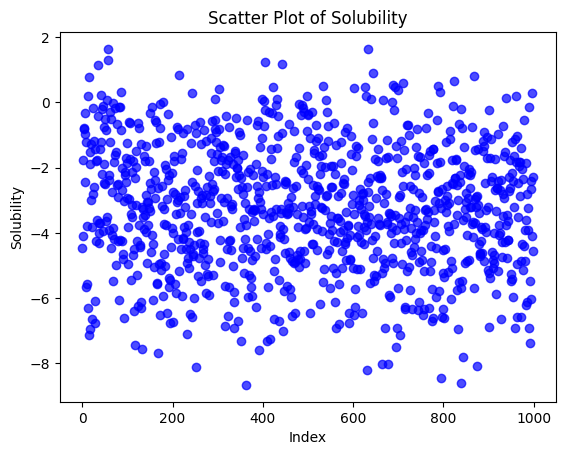

In [52]:
#a scatter plot of predictions
import matplotlib.pyplot as plt


solubility_values = predictions['solubility']

# Create a scatter plot
plt.scatter(range(len(solubility_values)), solubility_values, marker='o', color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Solubility')
plt.title('Scatter Plot of Solubility')

plt.savefig('/content/drive/MyDrive/Ersilia/1000MoleculesScatter_plot.png')

# Show the plot
plt.show()

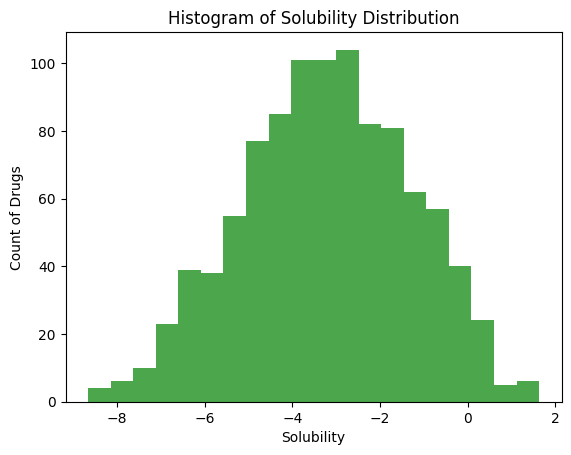

In [53]:
#an histogram
import matplotlib.pyplot as plt

solubility_values = predictions['solubility']

# Create a histogram
plt.hist(solubility_values, bins=20, color='green', alpha=0.7)

# Add labels and title
plt.xlabel('Solubility')
plt.ylabel('Count of Drugs')
plt.title('Histogram of Solubility Distribution')

plt.savefig('/content/drive/MyDrive/Ersilia/1000MoleculesHistogram_plot.png')
# Show the plot
plt.show()

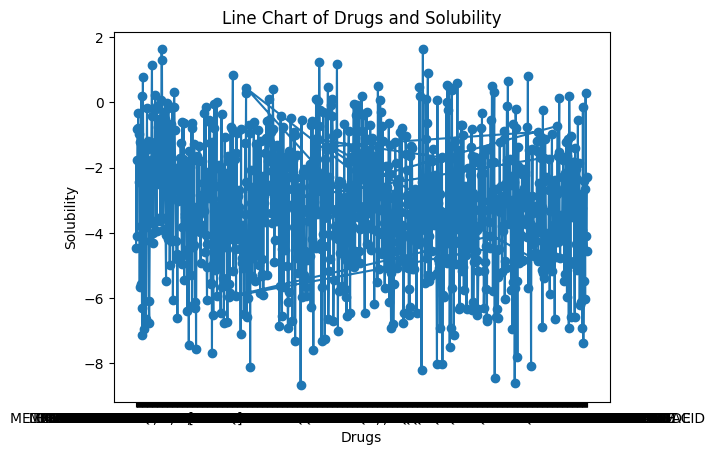

In [ ]:
#line chart
plt.plot(drugs, solubility_values, marker='o', linestyle='-')
plt.xlabel('Drugs')
plt.ylabel('Solubility')
plt.title('Line Chart of Drugs and Solubility')
plt.show()

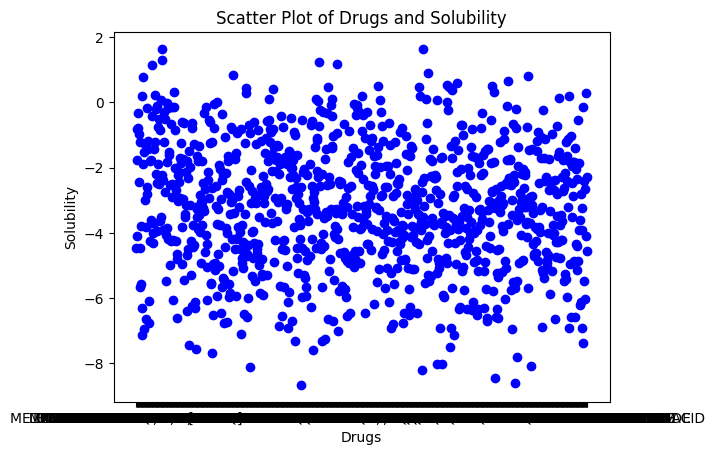

In [ ]:
plt.scatter(drugs, solubility_values, color='blue', marker='o')
plt.xlabel('Drugs')
plt.ylabel('Solubility')
plt.title('Scatter Plot of Drugs and Solubility')
plt.show()


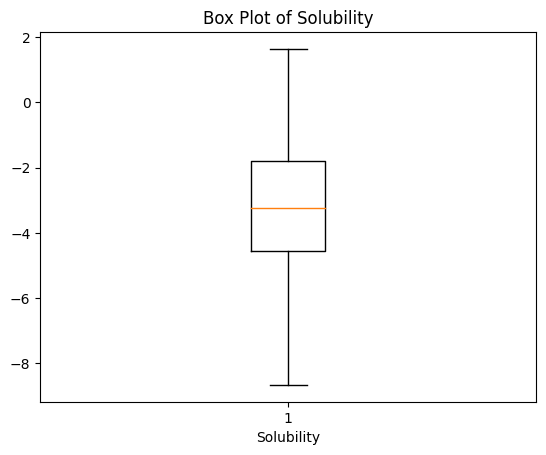

In [54]:
#box plot
plt.boxplot(solubility_values)
plt.xlabel('Solubility')
plt.title('Box Plot of Solubility')

plt.savefig('/content/drive/MyDrive/Ersilia/1000MoleculesBox_plot.png')
plt.show()

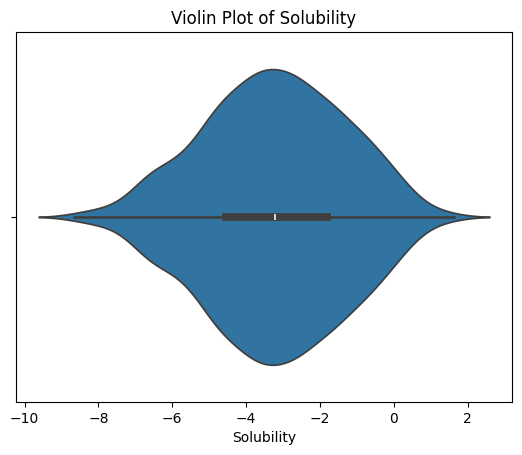

In [55]:
#violin plot
import seaborn as sns

sns.violinplot(x=solubility_values)
plt.xlabel('Solubility')
plt.title('Violin Plot of Solubility')

plt.savefig('/content/drive/MyDrive/Ersilia/1000MoleculesViolin_plot.png')
plt.show()